<a href="https://colab.research.google.com/github/shivansh2310/Finance-Stuff/blob/main/USD_INR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import math
import seaborn as sns

In [15]:
#data Loading
data=pd.read_csv("/content/INR_USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,46.400002,46.645000,46.400002,46.610001,46.610001,0.0
1,2010-01-04,46.610001,46.610001,46.223000,46.287998,46.287998,0.0
2,2010-01-05,46.287998,46.287998,46.088001,46.119999,46.119999,0.0
3,2010-01-06,46.147999,46.180000,45.700001,45.720001,45.720001,0.0
4,2010-01-07,45.737999,45.877998,45.557999,45.688000,45.688000,0.0


In [43]:
#adding other relevent rows
data['Timestamp']=pd.to_datetime(data['Date'])
data['Points']=data['Adj Close']-data['Adj Close'].shift(1)
data['Day_of_week']=data['Timestamp'].dt.dayofweek
data['Day_of_month']=data['Timestamp'].dt.day
data['month']=data['Timestamp'].dt.month
data['year']=data['Timestamp'].dt.year
data

,Date,Open,High,Low,Close,Adj Close,Volume,Timestamp,Points,Day_of_week,Day_of_month,month,year
0,2010-01-01,46.400002,46.645000,46.400002,46.610001,46.610001,0.0,2010-01-01,NaN,4,1,1,2010
1,2010-01-04,46.610001,46.610001,46.223000,46.287998,46.287998,0.0,2010-01-04,-0.322003,0,4,1,2010
2,2010-01-05,46.287998,46.287998,46.088001,46.119999,46.119999,0.0,2010-01-05,-0.167999,1,5,1,2010
3,2010-01-06,46.147999,46.180000,45.700001,45.720001,45.720001,0.0,2010-01-06,-0.399998,2,6,1,2010
4,2010-01-07,45.737999,45.877998,45.557999,45.688000,45.688000,0.0,2010-01-07,-0.032001,3,7,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,2023-06-30,82.075401,82.196297,82.008102,82.075401,82.075401,0.0,2023-06-30,0.048904,4,30,6,2023
3521,2023-07-03,82.096298,82.112396,81.766197,82.096298,82.096298,0.0,2023-07-03,0.020897,0,3,7,2023
3522,2023-07-04,81.950104,82.025597,81.866699,81.950104,81.950104,0.0,2023-07-04,-0.146194,1,4,7,2023
3523,2023-07-05,82.007103,82.348198,81.978104,82.007103,82.007103,0.0,2023-07-05,0.056999,2,5,7,2023


In [46]:
#dividing data into insample and out of sample
data_in=data[data['year']<=2022]
data_out=data[data['year']>2022]

In [47]:
## Backtesting on in sample data - data1
#grouping the dataframe by year
data_in_grouped=pd.DataFrame(data_in)
data_in_grouped=data_in.groupby(['year','Day_of_week'])['Points'].sum().reset_index()

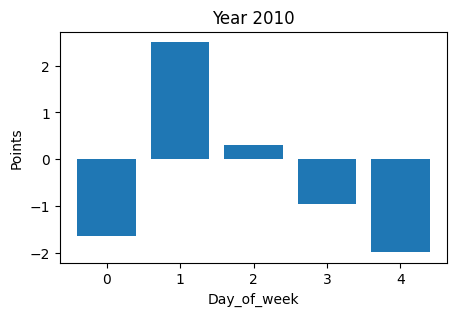

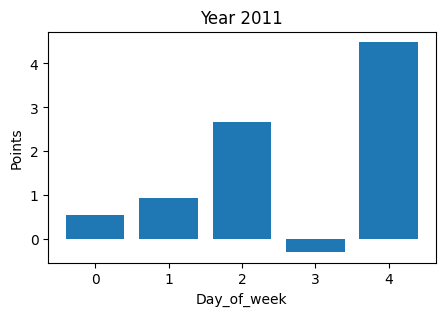

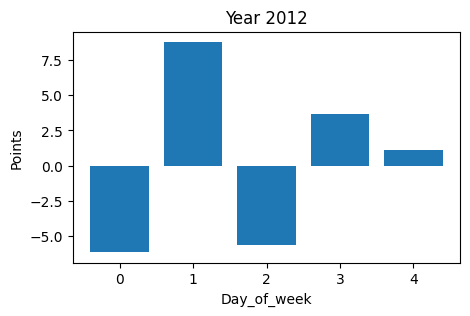

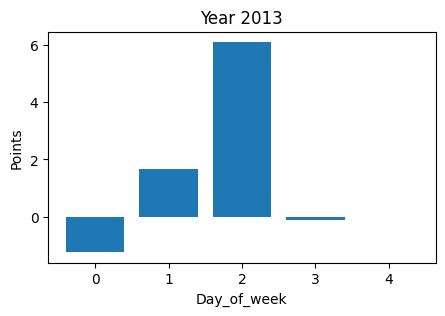

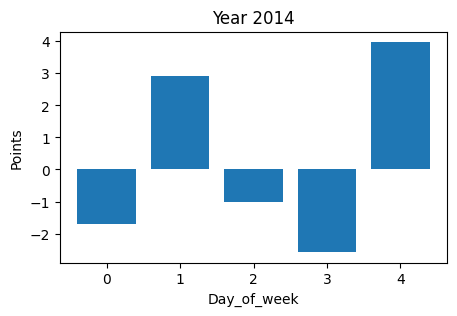

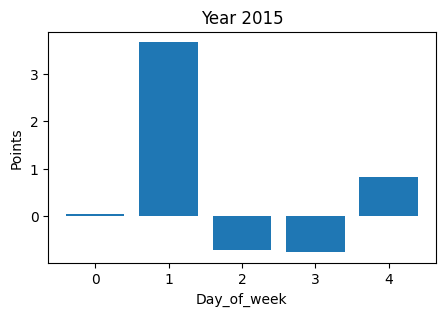

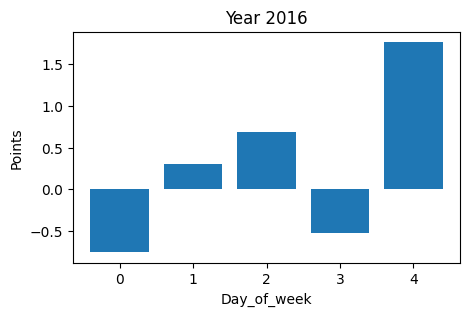

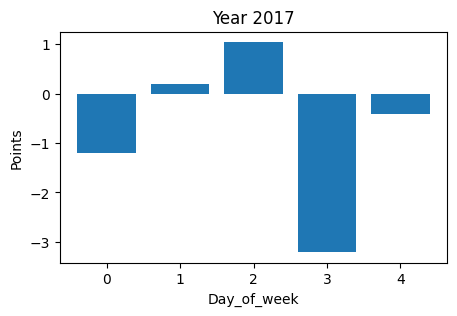

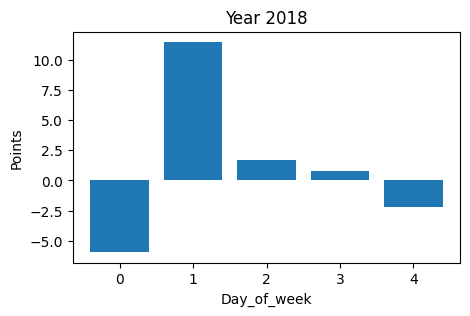

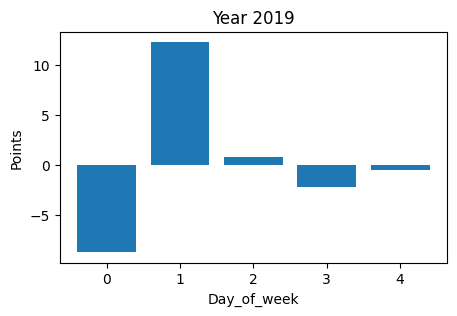

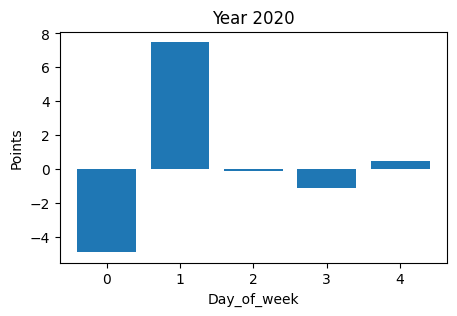

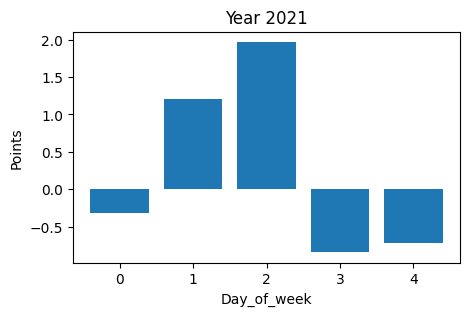

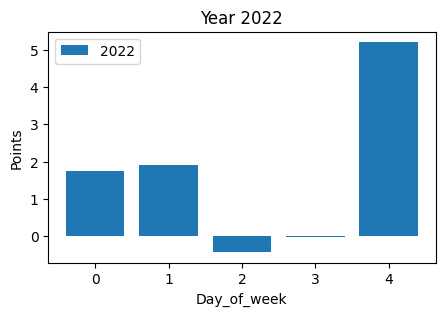

In [48]:
#Loop to make chart for each separate year
for year in data_in_grouped['year'].unique():
    year_data = data_in_grouped[data_in_grouped['year'] == year]
    plt.figure(figsize=(5,3))
    x_values = year_data['Day_of_week']
    y_values = year_data['Points']
    plt.bar(x_values, y_values,label=str(year))

    plt.xlabel('Day_of_week')
    plt.ylabel('Points')
    plt.title('Year {}'.format(year))
plt.legend()
plt.show()

In [50]:
#backtesting Friday Buy - Monday Sell strategy
#creating the conditional points and % gains column
data_in['daily%']=data_in['Points']/data_in['Adj Close']*100
data_in['position']=np.where((data_in['Day_of_week']==4) & (data_in['Day_of_week'].shift(-1)==0),1,0)
data_in['gain%']=data_in['position'].shift(1) * data_in['daily%']
data_in.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Timestamp,Points,Day_of_week,Day_of_month,month,year,daily%,position,gain%
0,2010-01-01,46.400002,46.645000,46.400002,46.610001,46.610001,0.0,2010-01-01,NaN,4,1,1,2010,NaN,1,NaN
1,2010-01-04,46.610001,46.610001,46.223000,46.287998,46.287998,0.0,2010-01-04,-0.322003,0,4,1,2010,-0.695651,0,-0.695651
2,2010-01-05,46.287998,46.287998,46.088001,46.119999,46.119999,0.0,2010-01-05,-0.167999,1,5,1,2010,-0.364265,0,-0.000000
3,2010-01-06,46.147999,46.180000,45.700001,45.720001,45.720001,0.0,2010-01-06,-0.399998,2,6,1,2010,-0.874886,0,-0.000000
4,2010-01-07,45.737999,45.877998,45.557999,45.688000,45.688000,0.0,2010-01-07,-0.032001,3,7,1,2010,-0.070042,0,-0.000000


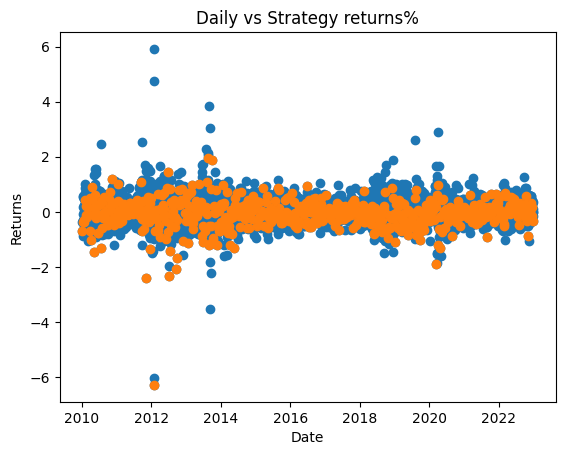

In [54]:
## Plot a Scatter Plot daily returns of the underlying to get an idea of distribution of returns.
x=data_in['Timestamp']
y=data_in['daily%']
filtered_data =data_in[data_in['gain%']!=0]
x2=filtered_data['Timestamp']
z=filtered_data['gain%']
plt.scatter(x,y,label='daily%')
plt.scatter(x2,z,label='gain%')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily vs Strategy returns%')
plt.show()

In [29]:
# Create a Function to Calculate Maximum Drawdown for a given data series
def calc_max_dd(data_series):

  cumm_ret=data_series.cumsum()
  hwm=cumm_ret.cummax()   #highest water mark
  dd=cumm_ret-hwm
  return round(min(dd),2)  # roundoff to 2 decimal places

In [55]:
# Replacing Nan values
data_in['gain%'].fillna(0, inplace=True)

max_dd = calc_max_dd(data_in['gain%'])
trades= data_in['position'].sum()
print(f'SI Max DD: {max_dd}%  and Total No. of Trades are: {trades}')

SI Max DD: -53.69%  and Total No. of Trades are: 678


<Axes: xlabel='Timestamp'>

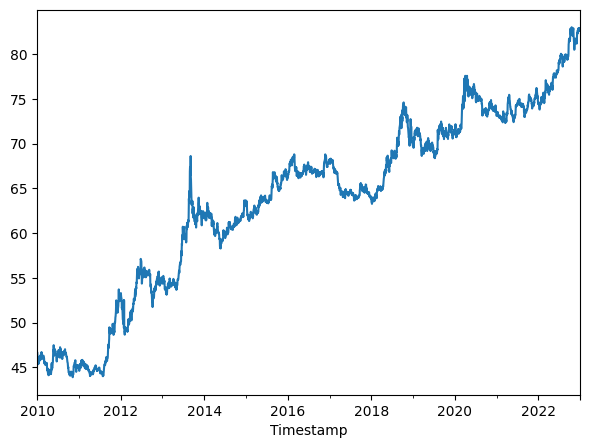

In [56]:
data_in.set_index(data_in['Timestamp'])['Adj Close'].plot(figsize=(7,5))

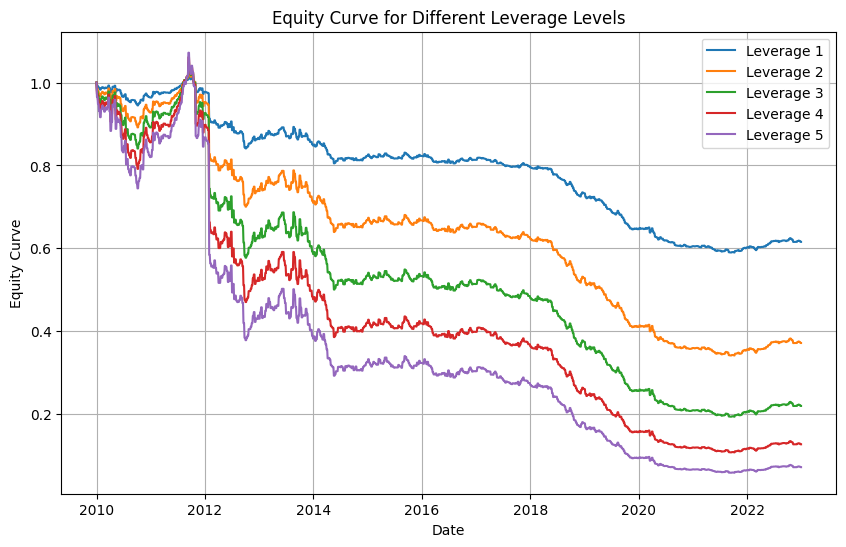

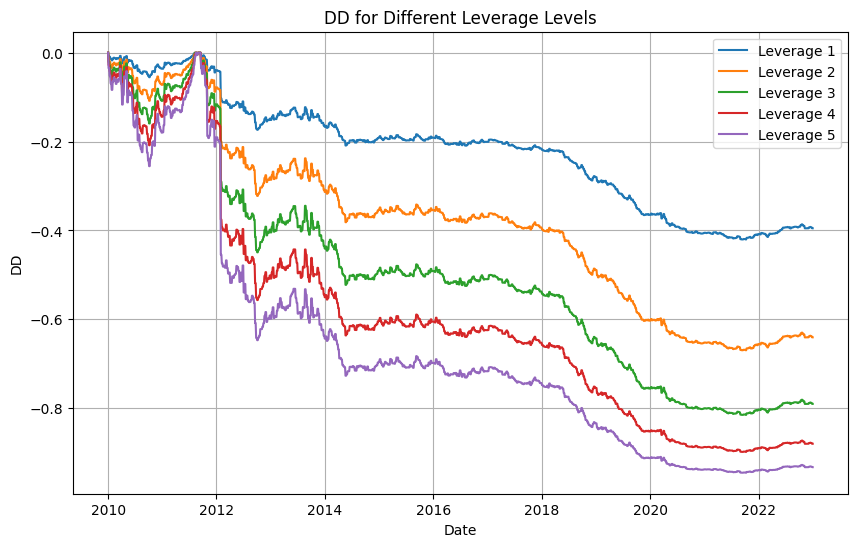

In [57]:
# Leverage levels
leverages = [1, 2, 3, 4 , 5]

# Calculate equity curve for each leverage level
equity_curves = {}
drawdowns={}
for leverage in leverages:
    equity_curve = (1 + leverage *(data_in['gain%']/100) ).cumprod()
    equity_curves[leverage] = equity_curve

# Calculating drawdowns
    previous_peaks = equity_curve.cummax()
    drawdown = (equity_curve - previous_peaks) / previous_peaks
    drawdowns[leverage] = drawdown

# Plot the equity and drawdown curves
plt.figure(figsize=(10, 6))
for leverage, equity_curve in equity_curves.items():
    plt.plot(data_in['Timestamp'], equity_curve, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('Equity Curve')
plt.title('Equity Curve for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for leverage, drawdown in drawdowns.items():
    plt.plot(data_in['Timestamp'], drawdown, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('DD')
plt.title('DD for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()

In [58]:

# Monty Carlo Simulation

def monte_carlo(simulations,df):

  mdd_list=[]
  for s in range(simulations):
    mdd=0
    reshuffle=data_in['gain%'].sample(frac=1).reset_index(drop=True)
    plt.plot(reshuffle.cumsum())
    mdd=calc_max_dd(reshuffle)
    mdd_list.append(mdd)
  plt.plot(data_in['gain%'].cumsum(),linewidth=3,color='black')
  plt.xlabel('Trade No.')
  plt.ylabel('Cummulative Returns')
  plt.title('Monte Carlo Simulation for {} Simulations'.format(simulations))
  plt.show()

  return mdd_list

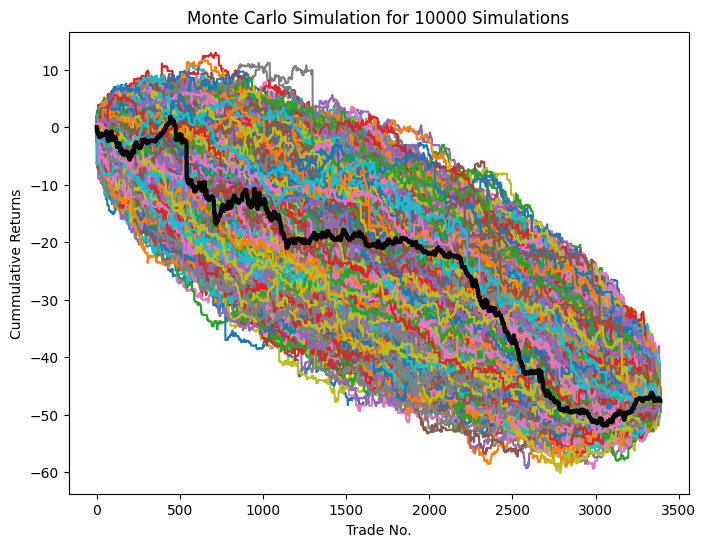

In [59]:
simulations=10000
plt.figure(figsize=(8,6))
mdd_list=monte_carlo(simulations,data_in)

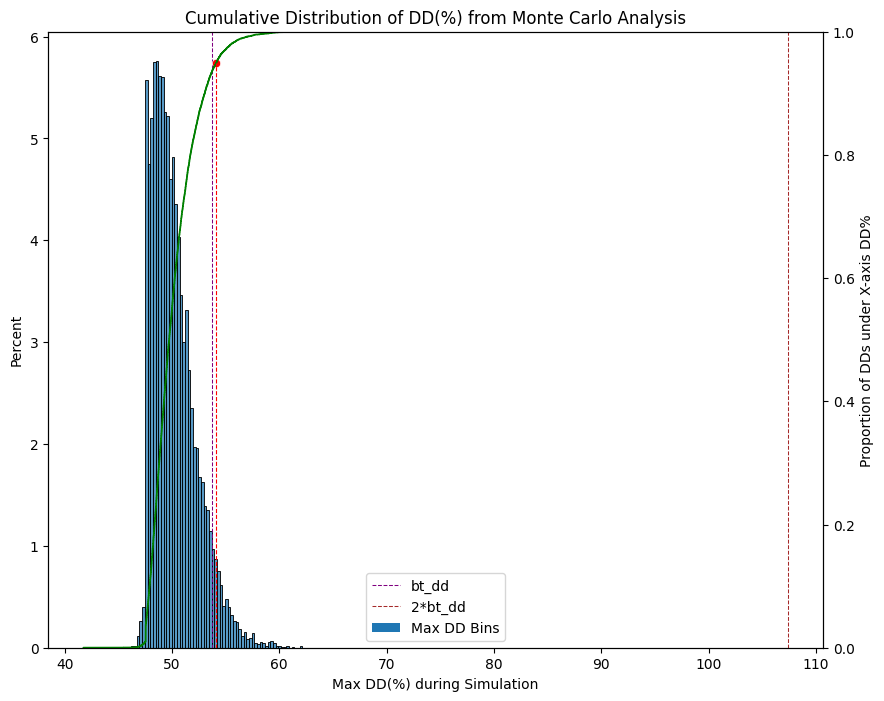

Backtest Drawdown: -53.69% , The 95.0 percentile of the Drawdown based on Monte Carlo is:54.15%


In [63]:
df_mdd=pd.DataFrame(mdd_list,columns=['Max DD'])
n_tile=0.95 # Cut-Off Percentile to plot
n_tile_value=np.round(df_mdd['Max DD'].quantile(q=1-n_tile),2)
bt_dd=calc_max_dd(data_in['gain%'])
fig,ax=plt.subplots(1,1,figsize=(10,8))
sns.histplot(ax=ax,x=-1*df_mdd['Max DD'],stat='percent')#,cumulative=True)
ax.set_title('Cumulative Distribution of DD(%) from Monte Carlo Analysis')
ax.set_xlabel('Max DD(%) during Simulation')
ax.axvline(-bt_dd,ymax=1,color='purple',linestyle='dashed',linewidth=0.75)
ax.axvline(-2*bt_dd,ymax=1,color='brown',linestyle='dashed',linewidth=0.75)
ax.legend(labels=['bt_dd','2*bt_dd','Max DD Bins'])
ax2 = ax.twinx()
sns.ecdfplot(ax=ax2,x=-1*df_mdd['Max DD'],color='green',linewidth=1.25)
sns.scatterplot(x=[-1*n_tile_value],y=[n_tile],ax=ax2,color='red')
ax2.axvline(-1*n_tile_value,ymax=n_tile,color='red',linestyle='dashed',linewidth=0.8)
ax2.set_ylabel('Proportion of DDs under X-axis DD%')
plt.show()
print(f'Backtest Drawdown: {bt_dd}% , The {n_tile*100} percentile of the Drawdown based on Monte Carlo is:{-1*n_tile_value}%')


In [64]:
data_out.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Timestamp,Points,Day_of_week,Day_of_month,month,year,daily%,position,gain%
3391,2023-01-02,82.749802,82.791199,82.426201,82.749802,82.749802,0.0,2023-01-02,-0.085296,0,2,1,2023,-0.103077,0,NaN
3392,2023-01-03,82.706001,83.030998,82.600998,82.706001,82.706001,0.0,2023-01-03,-0.043801,1,3,1,2023,-0.052960,0,-0.0
3393,2023-01-04,82.785698,83.003304,82.695999,82.785698,82.785698,0.0,2023-01-04,0.079697,2,4,1,2023,0.096269,0,0.0
3394,2023-01-05,82.666496,82.794998,82.428802,82.666496,82.666496,0.0,2023-01-05,-0.119202,3,5,1,2023,-0.144196,0,-0.0
3395,2023-01-06,82.645203,82.776299,82.281097,82.645203,82.645203,0.0,2023-01-06,-0.021293,4,6,1,2023,-0.025764,1,-0.0


In [65]:
#backtesting Friday Buy - Monday Sell strategy
#creating the conditional points and % gains column
data_out['daily%']=data_out['Points']/data_out['Adj Close']*100
data_out['position']=np.where((data_out['Day_of_week']==4) & (data_out['Day_of_week'].shift(-1)==0),1,0)
data_out['gain%']=data_out['position'].shift(1) * data_out['daily%']

#cutting the dataframe to remove noise
data_oos=pd.DataFrame({'Date': data_out['Timestamp'],'Price':data_out['Adj Close'],'Position':data_out['position'],'returns':data_out['daily%'],'gain%':data_out['gain%']})

data_oos['gain%'].fillna(0, inplace=True)
data_oos.head(8)

,Date,Price,Position,returns,gain%
3391,2023-01-02,82.749802,0,-0.103077,0.000000
3392,2023-01-03,82.706001,0,-0.052960,-0.000000
3393,2023-01-04,82.785698,0,0.096269,0.000000
3394,2023-01-05,82.666496,0,-0.144196,-0.000000
3395,2023-01-06,82.645203,1,-0.025764,-0.000000
3396,2023-01-09,82.273399,0,-0.451913,-0.451913
3397,2023-01-10,82.180099,0,-0.113531,-0.000000
3398,2023-01-11,81.637398,0,-0.664770,-0.000000


<Axes: xlabel='Date'>

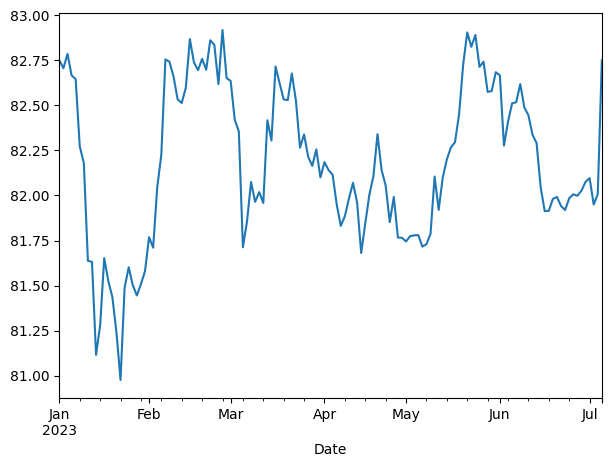

In [66]:
data_oos.set_index(data_oos['Date'])['Price'].plot(figsize=(7,5))

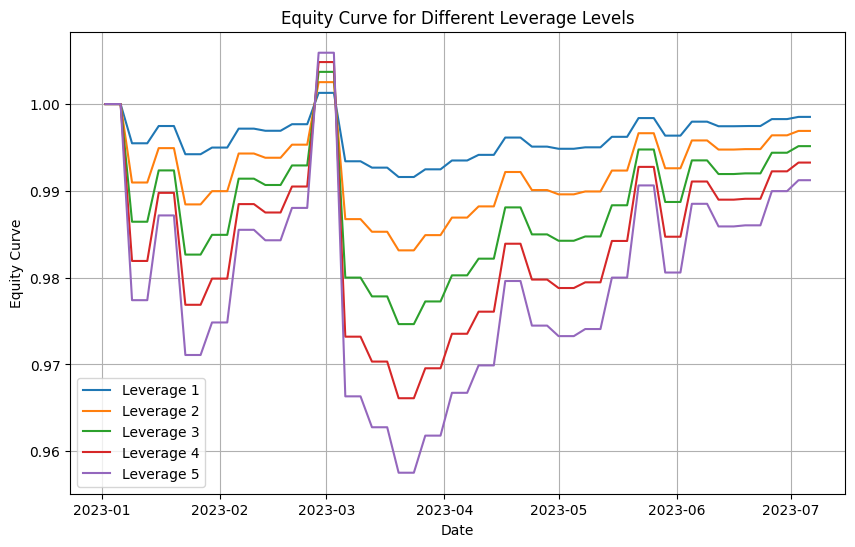

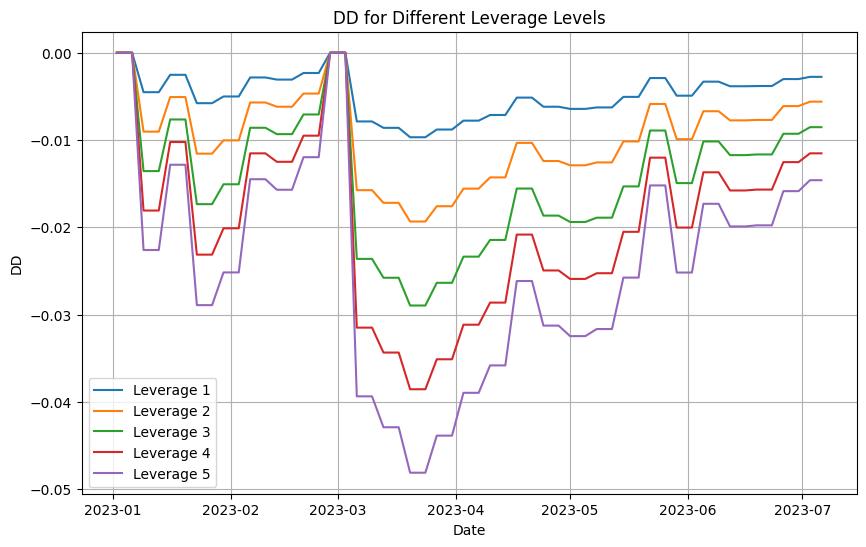

In [67]:
# Leverage levels
leverages = [1, 2, 3, 4 , 5]

# Calculate equity curve for each leverage level
equity_curves = {}
drawdowns={}
for leverage in leverages:
    equity_curve = (1 + leverage *(data_oos['gain%']/100) ).cumprod()
    equity_curves[leverage] = equity_curve

# Calculating drawdowns
    previous_peaks = equity_curve.cummax()
    drawdown = (equity_curve - previous_peaks) / previous_peaks
    drawdowns[leverage] = drawdown

# Plot the equity and drawdown curves
plt.figure(figsize=(10, 6))
for leverage, equity_curve in equity_curves.items():
    plt.plot(data_oos['Date'], equity_curve, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('Equity Curve')
plt.title('Equity Curve for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for leverage, drawdown in drawdowns.items():
    plt.plot(data_oos['Date'], drawdown, label=f"Leverage {leverage}")

plt.xlabel('Date')
plt.ylabel('DD')
plt.title('DD for Different Leverage Levels')
plt.legend()
plt.grid(True)
plt.show()